# <h1 style="color: brown;">EDA ON ADULT :-

## <h1 style="color: DARKBLUE;">IMPORTING LIBRARIES :-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import zipfile
import os

print('Import Libraries Successfully')

Import Libraries Successfully


## <h1 style="color: DARKBLUE;">UNZIP THE FILE

In [2]:
from zipfile import ZipFile
file = r"C:\Users\aelisha patel\Downloads\adult.zip"
extract_to = r"C:\Users\aelisha patel\Downloads\adult_unzipped"
with ZipFile(file, 'r') as zip:
    zip.printdir()
    print("Processing ......")
    zip.extractall(extract_to)
    print("Process completed")

File Name                                             Modified             Size
Index                                          2023-05-22 22:22:28          140
adult.data                                     2023-05-22 22:22:28      3974305
adult.names                                    2023-05-22 22:22:28         5229
adult.test                                     2023-05-22 22:22:28      2003153
old.adult.names                                2023-05-22 22:22:28         4267
Processing ......
Process completed


In [3]:
column_names = []

# Open the file and read line by line
with open("C:/Users/aelisha patel/Downloads/adult_unzipped/adult.names") as file:
    for line in file:
        if line.startswith("|"):
            continue
        if ":" in line:
            name = line.split(":")[0].strip()
            column_names.append(name)
column_names.append("income")
data = pd.read_csv("C:/Users/aelisha patel/Downloads/adult_unzipped/adult.data",
                   header=None,         # No header in the file
                   names=column_names,  # Use our list as column names
                   skipinitialspace=True)  # Remove extra spaces after commas
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

## <h1 style="color: DARKBLUE;">INFORMATION ABOUT DATA :-

In [4]:
print('Shape of data : {}'.format(data.shape))
print('Number of row : {}'.format(data.shape[0]))
print('Number of columns : {}'.format(data.shape[1]))

Shape of data : (32561, 15)
Number of row : 32561
Number of columns : 15


In [5]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


### REPLACE THE COLUMN NAME AND DATA CLEANNG

In [6]:
data.columns = data.columns.str.replace('sex', 'gender')
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
print(data.isna().sum().sort_values(ascending = False))
print('Duplicated Values in data are', data.duplicated().sum())
print('duplicated dropped')

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
Duplicated Values in data are 24
duplicated dropped


In [8]:
data['gender'].value_counts()

Male      21790
Female    10771
Name: gender, dtype: int64

In [9]:
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
data['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [11]:
data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [12]:
data['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [13]:
data.groupby('income', as_index=False)['hours-per-week'].mean().sort_values(by='hours-per-week', ascending=False)

,income,hours-per-week
1,>50K,45.473026
0,<=50K,38.840210


In [14]:
data.groupby("income", as_index=False)[["education-num"]].mean().sort_values(by="education-num", ascending=False)

,income,education-num
1,>50K,11.611657
0,<=50K,9.595065


In [15]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [16]:
# Fill missing values with mode or mean
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native-country'].fillna(data['native-country'].mode()[0], inplace=True)
data['hours-per-week'].fillna(data['hours-per-week'].mean(), inplace=True)
data['income'].fillna(data['income'].mode()[0], inplace=True)

# Replace income labels with 0 and 1
data.replace(to_replace=['<=50K', '>50K'], value=[0, 1], inplace=True)

In [17]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


##<h1 style="color: darkblue;">DATA VISUALIZATION :-

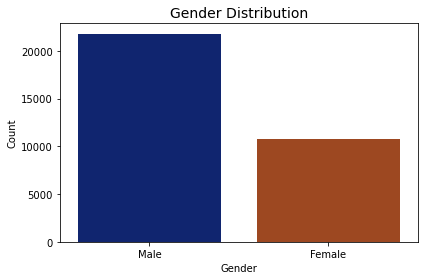

In [18]:
## Most individuals in the dataset are male, showing a gender imbalance in the population.

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=data, x='gender', palette='dark')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, color='white')

plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

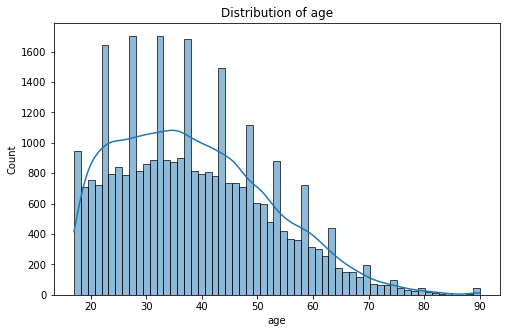

In [19]:
## The age distribution is right-skewed, with most individuals between 25 and 50 years old.
plt.figure(figsize=[8, 5])
sns.histplot(data.age, kde=True);
plt.title("Distribution of age");

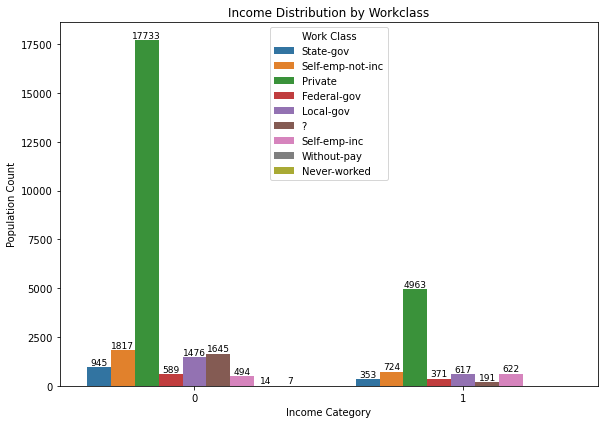

In [20]:
## The chart shows that most people work in the private sector, 
 # but those who earn more than 50K are more often from the government or self-employed groups.

plt.figure(figsize=(8.5, 6))
ax = sns.countplot(x='income', hue='workclass', data=data)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)
plt.xlabel('Income Category')
plt.ylabel('Population Count')
plt.title('Income Distribution by Workclass')
plt.legend(loc='best', title='Work Class')
plt.tight_layout()
plt.show()

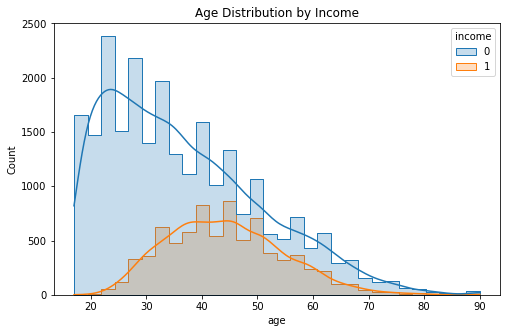

In [21]:
## The chart shows that most people are between 25 and 50 years old. 
 # People with income 0(<=50K) are more common at younger ages,  income 1(>50K) is more frequent from ages 30 to 60.

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="age", hue="income", bins=30, kde=True, stat="count", element="step")
plt.title("Age Distribution by Income")
plt.show()

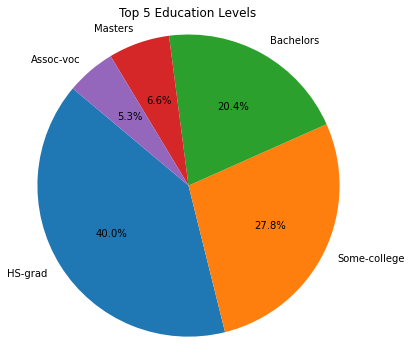

In [22]:
## This pie chart shows the top 5 education levels, with HS-grad, 
 # Some-college, and Bachelors making up the largest portions of the population.

edu_counts = data['education'].value_counts().nlargest(5)
labels = edu_counts.index
sizes = edu_counts.values
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Education Levels")
plt.axis('equal')
plt.show()

In [23]:
grouped = data.groupby(['income', 'race']).size().reset_index(name='count')
grouped['percent'] = grouped.groupby('income')['count'].apply(lambda x: 100 * x / x.sum())

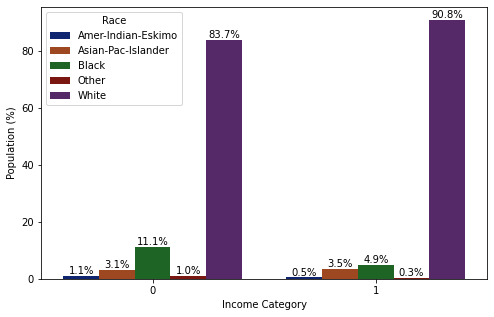

In [24]:
## This chart shows that across both income groups, the White race has the highest percentage, 
 # while other races make up a smaller share, especially in the >50K (1) income group.
    
    
plt.figure(figsize=[8, 5])
ax = sns.barplot(x="income", y="percent", hue="race", data=grouped, palette='dark')
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=10)

plt.xlabel('Income Category')
plt.ylabel('Population (%)')
plt.legend(loc='best', title="Race")
plt.show()

In [25]:
## This pie chart shows the income distribution, where the majority of people earn <=50K, 
 # and a smaller portion earns >50K.
    
income_counts = data['income'].value_counts()
labels = income_counts.index
sizes = income_counts.values

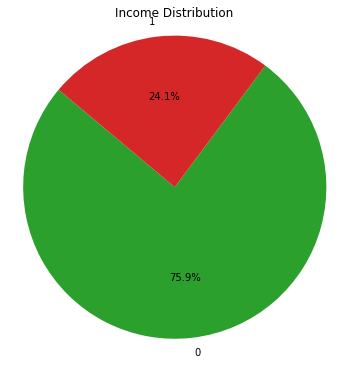

In [26]:
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = ['#2ca02c', '#d62728'])
plt.title("Income Distribution")
plt.axis('equal')
plt.show()


In [27]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [28]:
avg_hours = data.groupby("education")["hours-per-week"].mean().sort_values()

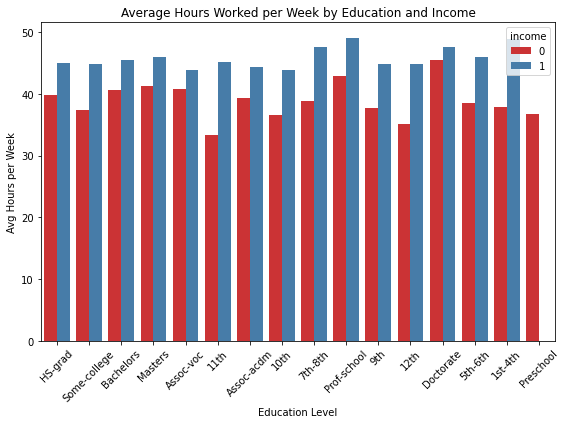

In [29]:
## This chart shows that people with higher education levels like Doctorate or Masters 
 # tend to work more hours per week on average than those with lower education.

avg_hours = data.groupby(['education', 'income'])['hours-per-week'].mean().reset_index()
order = data['education'].value_counts().index.tolist()
plt.figure(figsize=(8,6))
sns.barplot(data=avg_hours, x="education", y="hours-per-week", hue="income", order=order, palette="Set1")
plt.title("Average Hours Worked per Week by Education and Income")
plt.xlabel("Education Level")
plt.ylabel("Avg Hours per Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

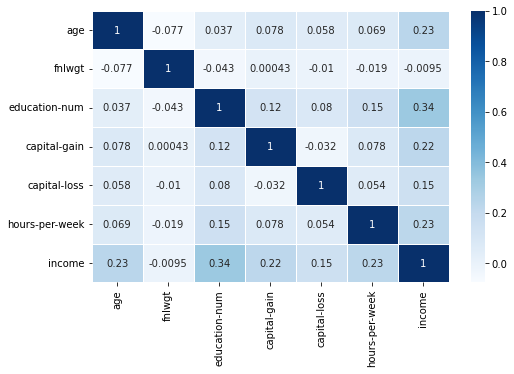

In [30]:
## This heatmap shows the correlation between numerical features, where most values are weakly correlated; 
 # however, age and hours-per-week show a slight positive relationship.

plt.figure(figsize=[8, 5])
num_col = data.select_dtypes(include='number').columns
sns.heatmap(data[num_col].corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.show()

# Conclusion :-